In [1]:
import sys
sys.path.append('../..')
import ugent

from pyslise2d import Pyslise2D
from math import pi

p = Pyslise2D(lambda x, y: 0, 0,pi, 0,pi, tolerance=1e-8, N=10)

In [2]:
p.__sectors

In [3]:
n = 100

def test_zero(N):
    p = Pyslise2D(lambda x, y: 0, 0,pi, 0,pi, tolerance=1e-12, N=N)

    exact, exact_ij = zip(*sorted([(i*i+j*j, (i, j)) for i in range(1, n) for j in range(1, n)])[:2*n])

    eigs = p.eigenvaluesByIndex(0, 100)
    errors = []
    j = 0
    last = 0
    for i, E, m in eigs:
        for _ in range(m):
            if exact[j] != last:
                errors.append([])
            errors[-1].append((j+1, 2**-53 + abs(E - exact[j])/exact[j]))
            last = exact[j]
            j += 1
    
    return errors

results = {
    5: test_zero(5),
    8: test_zero(8),
    11: test_zero(11)
}

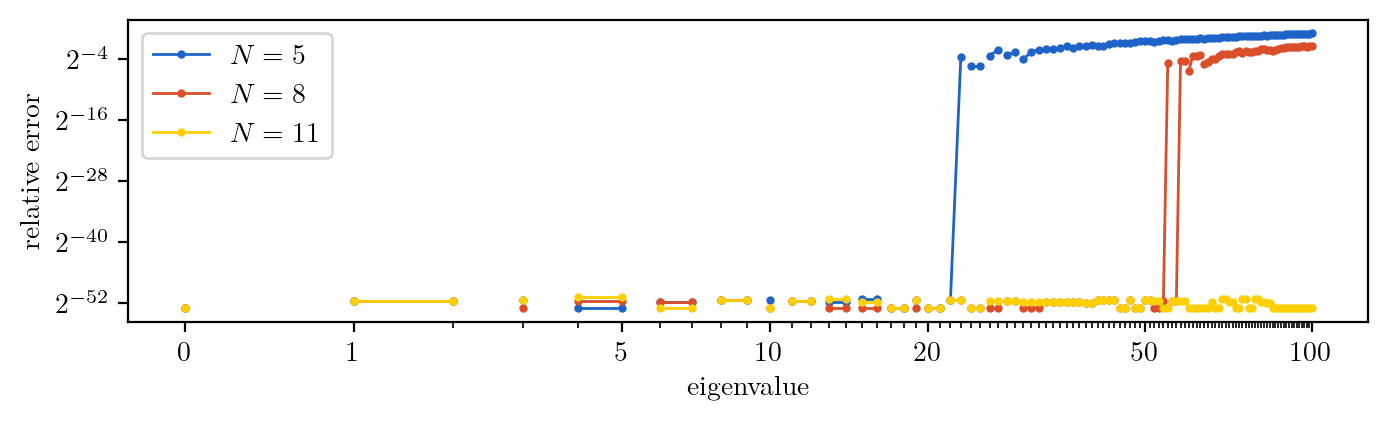

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 2), dpi=200)

for c, r in zip(ugent.palet, [5, 8, 11]):
    data = results[r]
    args = dict(label=f"$N={r}$", color=c, marker='.', ls='-', lw=1, markersize=4, base=2)
    for row in data:
        ax.loglog(*zip(*row),**args)
        if "label" in args:
            del args["label"]
        
xticks = [1, 2, 6, 11, 21, 51, 101]
ax.set_xlabel("eigenvalue")
ax.set_ylabel("relative error")
ax.set_yticks([2**-i for i in range(4, 53, 12)])
ax.set_xticks(xticks, labels=[f"${i-1}$" for i in xticks])
ax.set_xticks(range(1, 101), minor=True, labels=[])
ax.legend(loc="upper left")

plt.savefig(f"zero_lobatto.pdf", bbox_inches="tight")
plt.show()

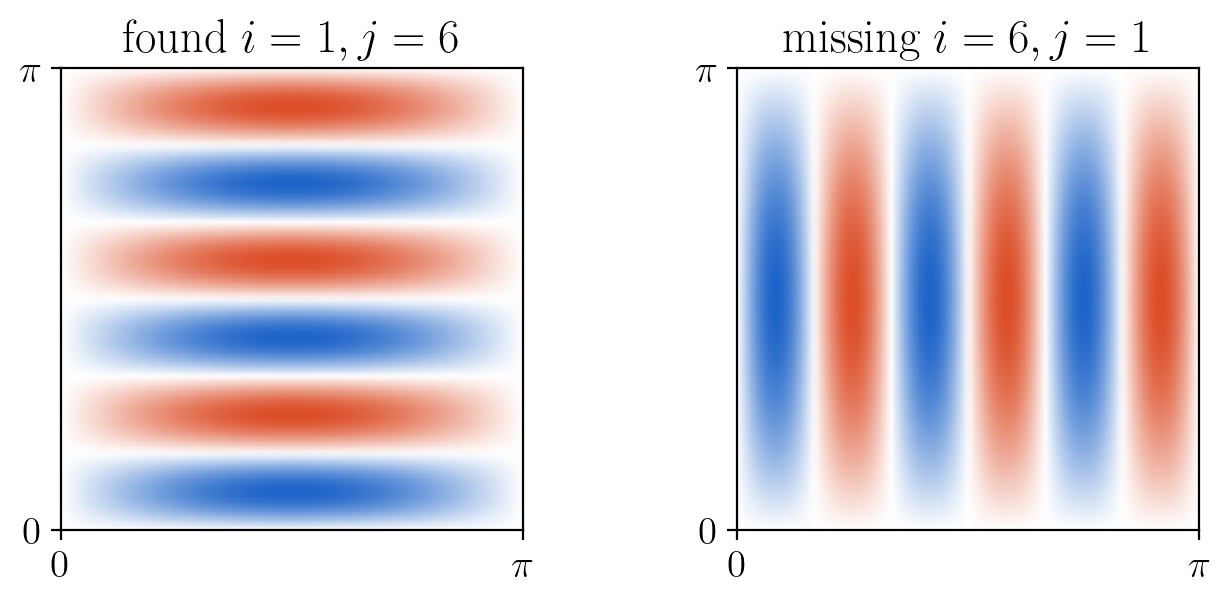

In [100]:
import numpy as np

p = Pyslise2D(lambda x, y: 0, 0,pi, 0,pi, tolerance=1e-12, N=5)

x = np.linspace(0, pi, 100)
f = p.eigenfunction(37)[0]
Z = f(x, x)
X, Y = np.meshgrid(x, x)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=200)

axes[0].pcolormesh(X, Y, Z.T, cmap=ugent.RdBu, shading='gouraud')
axes[0].set_title("found $i = 1, j = 6$")
axes[1].pcolormesh(X, Y, np.sin(6*X) * np.sin(Y), cmap=ugent.RdBu, shading='gouraud')
axes[1].set_title("missing $i = 6, j = 1$")

for ax in axes:
    ax.set_aspect("equal")
    ax.set_xlim(0, pi)
    ax.set_ylim(0, pi)
    ax.set_xticks([0,pi],labels=["$0$", "$\\pi$"])
    ax.set_yticks([0,pi],labels=["$0$", "$\\pi$"])


plt.savefig(f"zero_missing.png", bbox_inches="tight", dpi=1000)
plt.show()


In [99]:
Z[30:-30,30:-30]

array([[-0.2803629 , -0.19273492, -0.09814099, ...,  0.09814099,
         0.19273492,  0.2803629 ],
       [-0.28655609, -0.19699241, -0.10030892, ...,  0.10030892,
         0.19699241,  0.28655609],
       [-0.29246074, -0.20105155, -0.10237584, ...,  0.10237584,
         0.20105155,  0.29246074],
       ...,
       [-0.29246074, -0.20105155, -0.10237584, ...,  0.10237584,
         0.20105155,  0.29246074],
       [-0.28655609, -0.19699241, -0.10030892, ...,  0.10030892,
         0.19699241,  0.28655609],
       [-0.2803629 , -0.19273492, -0.09814099, ...,  0.09814099,
         0.19273492,  0.2803629 ]])

In [130]:
%%bash
python -m pip install cython

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.8 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [1]:
%load_ext cython

In [14]:
from strands import Schrodinger2D, Rectangle

def V(x, y):
    return (x*x+1)*(y*y+1)

s = Schrodinger2D(V, Rectangle(-5.5,5.5,-5.5,5.5), gridSize=(92,92), maxBasisSize=60)
seigs = np.array(s.eigenvalues(13))
seigs

array([ 3.19591809,  5.52674387,  5.52674387,  7.55780333,  8.03127234,
        8.44458136,  9.92806106,  9.92806106, 11.31181705, 11.31181705,
       12.10325358, 12.20117897, 13.33233127])

In [21]:
from pyslise2d import Pyslise2D
import numpy as np

def V(x, y):
    return (x*x+1)*(y*y+1)

p = Pyslise2D(V, -5.5,5.5, -5.5,5.5, tolerance=1e-12, N=20, steps_per_sector=3)
print("constructed")
peigs = []
for i, E, m in p.eigenvaluesByIndex(0, 13):
    for _ in range(m):
        peigs.append(E)
peigs = np.array(peigs[:len(seigs)])

np.abs(peigs - seigs)

constructed


array([2.18804077e-08, 6.37554232e-08, 6.37553992e-08, 7.39934727e-08,
       9.32725008e-09, 5.32003490e-08, 8.82962237e-08, 8.82961899e-08,
       1.98332710e-07, 1.98332659e-07, 1.35768197e-08, 1.19832418e-07,
       7.62207897e-08])

In [23]:
p.eigenvaluesByIndex(0, 13)

[(0, 3.1959181070806366, 1),
 (1, 5.5267439381504, 2),
 (3, 7.5578034007799015, 1),
 (4, 8.031272349641545, 1),
 (5, 8.444581414770331, 1),
 (6, 9.928061145248131, 2),
 (8, 11.31181724895132, 2),
 (10, 12.103253565143113, 1),
 (11, 12.201179087805532, 1),
 (12, 13.332331347376357, 1),
 (13, 14.348268648559497, 2)]

In [18]:
peigs[0]

3.1959181054828183

In [24]:
peigs = []
for i, E, m in [(0, 3.1959181075550234, 1), (1, 5.526744022585775, 2), (3, 7.5578033979647685, 1), (4, 8.031272331835403, 1), (5, 8.444581426627972, 1), (6, 9.928061347173, 2), (8, 11.311815386151245, 1), (9, 11.311818764958344, 1), (10, 12.103253578693684, 1), (11, 12.201179124126103, 1), (12, 13.332331292607009, 1), (13, 14.34826862724273, 2)]:
    for _ in range(m):
        peigs.append(E)
peigs = np.array(peigs[:len(seigs)])

np.abs(peigs - seigs)

array([2.23547945e-08, 1.48190798e-07, 1.48190774e-07, 7.11783397e-08,
       8.47889225e-09, 6.50579892e-08, 2.90221092e-07, 2.90221058e-07,
       1.66446736e-06, 1.71433968e-06, 2.62492250e-11, 1.56152989e-07,
       2.14514415e-08])